# <font color=''>**Simple Linear Regression**
In this lesson we used Python's scikit-learn library to implement simple linear regression. Worked on a dataset of fuel consumption and carbon dioxide emission of cars. Splited our data into train and test sets, created a regression model using train set, evaluated model using test set and then used the model to predict unknown values.

#### Importing Packages
Let's import some necessary packages for regression analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl
%matplotlib inline

#### Loading Data
Loading the dataset in to an object.

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv'
df = pd.read_csv(path) 

#### Data Exploration
Let's explore the dataset to gather some important insights for model development

In [3]:
df.head(4) 

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255


In [4]:
df.describe() 

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

#### Select Some Features
Let's select some features to explore the data more closely

In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']] 
cdf.head(4) 

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255


#### Ploting the Features
Plot each of these features

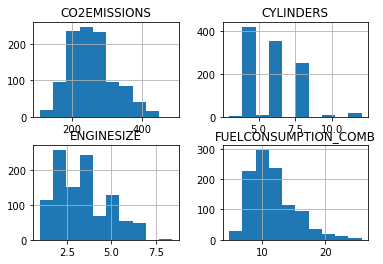

In [7]:
cdf.hist() 
plt.show() 

#### Ploting the Features
Let's see the linear relation between each of these features with CO2 emission

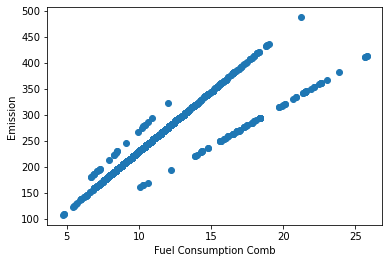

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS) 
plt.xlabel('Fuel Consumption Comb')
plt.ylabel('Emission')
plt.show() 

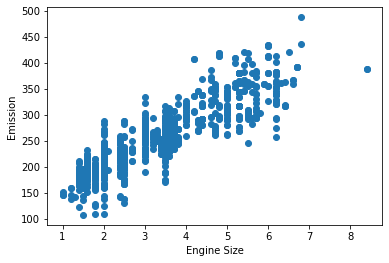

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS) 
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show() 

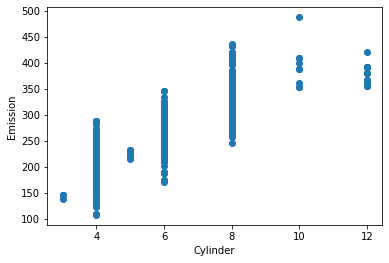

In [10]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS) 
plt.xlabel('Cylinder')
plt.ylabel('Emission')
plt.show()

#### Spliting Dataset
Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. We create a mask to select random rows using *np.random.rand()* function

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk] 
test = cdf[~msk] 

#### Data Distribution
See the data distribution of train set

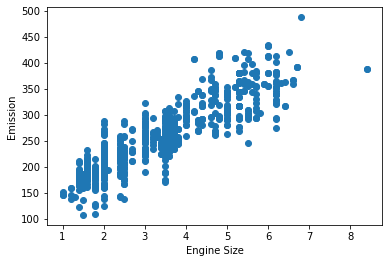

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS) 
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show() 

#### Modeling
Created the model with sklearn package, we chose 'ENGINESIZE' against 'CO2EMISSIONS' to train our regression model.

In [13]:
from sklearn import linear_model

In [14]:
regr = linear_model.LinearRegression() 

In [15]:
train_x = np.asanyarray(train[['ENGINESIZE']]) 
train_y = np.asanyarray(train[['CO2EMISSIONS']]) 

In [16]:
regr.fit(train_x, train_y) 

LinearRegression()

In [17]:
print('Coefficient: ', regr.coef_)
print('Intercept: ', regr.intercept_) 

Coefficient:  [[39.87587792]]
Intercept:  [122.99602866]


#### Plot the Output
We can plot the fit line over the data

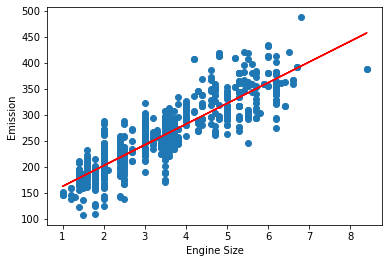

In [18]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS) 
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r') 
plt.xlabel('Engine Size')
plt.ylabel('Emission') 
plt.show() 

#### Evaluation
Compare the actual values and predicted values to calculate the accuracy of a regression model  
There are different model evaluation metrics:
- Mean absolute error: It is the mean of the absolute value of the errors.  
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s focus is geared more towards large errors.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of our model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative.

In [19]:
from sklearn.metrics import r2_score

In [20]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']]) 
test_yhat = regr.predict(test_x) 

In [21]:
test_yhat

array([[310.41265487],
       [290.47471591],
       [242.62366241],
       [202.7477845 ],
       [202.7477845 ],
       [282.49954033],
       [394.1519985 ],
       [202.7477845 ],
       [202.7477845 ],
       [242.62366241],
       [202.7477845 ],
       [202.7477845 ],
       [242.62366241],
       [202.7477845 ],
       [202.7477845 ],
       [242.62366241],
       [298.4498915 ],
       [298.4498915 ],
       [298.4498915 ],
       [242.62366241],
       [242.62366241],
       [298.4498915 ],
       [298.4498915 ],
       [298.4498915 ],
       [298.4498915 ],
       [242.62366241],
       [242.62366241],
       [266.54918916],
       [218.69813566],
       [266.54918916],
       [266.54918916],
       [202.7477845 ],
       [266.54918916],
       [266.54918916],
       [242.62366241],
       [370.22647175],
       [370.22647175],
       [266.54918916],
       [266.54918916],
       [370.22647175],
       [370.22647175],
       [218.69813566],
       [266.54918916],
       [334

In [31]:
print('Mean Absolute Error %.2f' % np.mean(np.absolute(test_yhat - test_y)))  
print('Residual Some of Squares (MSE) %.2f' % np.mean((test_yhat - test_y)**2))  
print('R2-Score %.2f' % r2_score(test_y, test_yhat))  

Mean Absolute Error 24.80
Residual Some of Squares (MSE) 1024.48
R2-Score 0.71
